<img src="https://www.pucsp.br/sites/default/files/download/ODS/PUCSP-ODS-brasao_FundoTransparente-textoPreto.png" alt="Logo PUC / ODS" style="width: 25%;">

# Hackathon:
## Como as teses e dissertações da PUC-SP se alinham aos Objetivos de Desenvolvimento Sustentável?

## Grupo

| Nome | RA |
|---|---|
| Ana Clara Rodrigues | RA00333452 |
| Danyel Usero | RA00297824 |
| Felipe Burgos | RA00347813 |
| Gabriel Machado | RA00349689 |
| Luisa Peixoto | RA00346006 |
| Matheus Freitas | RA00346280 |
| Matheus Lobao | RA00346765 |
| Manoela Finotti | RA00319067 |
| Melissa Assis | RA00320501 |
| Simeon Ivanov | RA00297777 |

## Importando Bibliotecas

In [17]:
import pandas as pd
import os
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
# from nltk.corpus import wordnet
from nltk.corpus import wordnet as wn
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Dados de Treino

### Baixando Dados de Treino

In [18]:
df = pd.read_csv('/content/drive/MyDrive/train_df.tsv', sep='\t')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df.head()

,data,uri,idioma,editor,programa,direito_acesso,departamento,area_cnpq,titulo,tipo,patrocinio,keywords,abstract,palavras_chave,resumo
0,2022-03-29,https://repositorio.pucsp.br/jspui/handle/hand...,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Tecnologi...,Acesso Aberto,Faculdade de Ciências Exatas e Tecnologia,CNPQ::ENGENHARIAS,Transformação digital na contabilidade: as nov...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Technological innovation | Accounting | Accoun...,This research discusses the impact of digital ...,Inovação tecnológica | Contabilidade | Contado...,Esta pesquisa discute o impacto da transformaç...
1,2019-08-27,https://tede2.pucsp.br/handle/handle/22688,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Educação:...,Acesso Aberto,Faculdade de Educação,CNPQ::CIENCIAS HUMANAS::EDUCACAO::TOPICOS ESPE...,A política cultural francesa e o Lyceu Franco-...,Dissertação,Conselho Nacional de Pesquisa e Desenvolviment...,Política cultural francesa | Liceu Pasteur (Sa...,This dissertation has as its object the Liceu ...,"Liceu Pasteur (Sao Paulo, SP) - História | Lyc...",Esta dissertação investiga o Lyceu Franco-Bras...
2,2010-05-18,https://tede2.pucsp.br/handle/handle/15921,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Psicologi...,Acesso Aberto,Psicologia,CNPQ::CIENCIAS HUMANAS::PSICOLOGIA,"Homoconjugalidade masculina, revelação e redes...",Dissertação,0,Gay male couple | Social network,This study aimed to understand how the process...,Conjugalidade homossexual | Companheiros homos...,Este estudo teve como objetivo compreender com...
3,2012-06-22,https://tede2.pucsp.br/handle/handle/12738,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Sociabilidade e modernidade nos espaços de laz...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Sociability | Leisure | Civility | Modernity,The practices of sociability and culture of a ...,Sociabilidade | Lazer | Civilidade | Modernidade,As práticas de sociabilidade e cultura de uma ...
4,2006-08-25,https://tede2.pucsp.br/handle/handle/12953,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Escolas ao povo: experiências de escolarização...,Tese,Coordenação de Aperfeiçoamento de Pessoal de N...,0,0,"Pobres | Escolarização | Bahia | Bahia, BA -- ...",Esta pesquisa teve como objeto acompanhar o pr...


### Analisando os Dados

In [21]:
#tamanho do df
df.shape

(6069, 15)

In [22]:
#verificando campos vazios
df.isnull().sum()

data              0
uri               0
idioma            0
editor            0
programa          0
direito_acesso    0
departamento      0
area_cnpq         0
titulo            0
tipo              0
patrocinio        0
keywords          0
abstract          0
palavras_chave    0
resumo            0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   data            6069 non-null   object
 1   uri             6069 non-null   object
 2   idioma          6069 non-null   object
 3   editor          6069 non-null   object
 4   programa        6069 non-null   object
 5   direito_acesso  6069 non-null   object
 6   departamento    6069 non-null   object
 7   area_cnpq       6069 non-null   object
 8   titulo          6069 non-null   object
 9   tipo            6069 non-null   object
 10  patrocinio      6069 non-null   object
 11  keywords        6069 non-null   object
 12  abstract        6069 non-null   object
 13  palavras_chave  6069 non-null   object
 14  resumo          6069 non-null   object
dtypes: object(15)
memory usage: 711.3+ KB


### Pre-Processamento

In [24]:
def preprocessText(msg):
    #removendo pontuação
    removepunc = [c for c in msg if c not in string.punctuation]
    removepunc = "".join(removepunc)
    #caixa baixa
    lower = removepunc.lower()
    #stop_words
    tokenize = nltk.word_tokenize(lower)
    remove_stop = [word for word in tokenize if word not in stopwords.words('portuguese')]
    #removendo números
    remove_digit = [word for word in remove_stop if not word.isdigit()]
    joinagain = " ".join(remove_digit)
    return joinagain

In [25]:
df['palavras_chave_pre'] = df['palavras_chave'].apply(preprocessText)

In [26]:
df['resumo_pre'] = df['resumo'].apply(preprocessText)

In [27]:
df.to_csv('preprocessado.csv')

In [28]:
df_pre = pd.read_csv('preprocessado.csv')

In [29]:
df_pre.head()

,Unnamed: 0,data,uri,idioma,editor,programa,direito_acesso,departamento,area_cnpq,titulo,tipo,patrocinio,keywords,abstract,palavras_chave,resumo,palavras_chave_pre,resumo_pre
0,0,2022-03-29,https://repositorio.pucsp.br/jspui/handle/hand...,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Tecnologi...,Acesso Aberto,Faculdade de Ciências Exatas e Tecnologia,CNPQ::ENGENHARIAS,Transformação digital na contabilidade: as nov...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Technological innovation | Accounting | Accoun...,This research discusses the impact of digital ...,Inovação tecnológica | Contabilidade | Contado...,Esta pesquisa discute o impacto da transformaç...,inovação tecnológica contabilidade contador re...,pesquisa discute impacto transformação digital...
1,1,2019-08-27,https://tede2.pucsp.br/handle/handle/22688,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Educação:...,Acesso Aberto,Faculdade de Educação,CNPQ::CIENCIAS HUMANAS::EDUCACAO::TOPICOS ESPE...,A política cultural francesa e o Lyceu Franco-...,Dissertação,Conselho Nacional de Pesquisa e Desenvolviment...,Política cultural francesa | Liceu Pasteur (Sa...,This dissertation has as its object the Liceu ...,"Liceu Pasteur (Sao Paulo, SP) - História | Lyc...",Esta dissertação investiga o Lyceu Franco-Bras...,liceu pasteur sao paulo sp história lyceu fran...,dissertação investiga lyceu francobrasileiro s...
2,2,2010-05-18,https://tede2.pucsp.br/handle/handle/15921,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Psicologi...,Acesso Aberto,Psicologia,CNPQ::CIENCIAS HUMANAS::PSICOLOGIA,"Homoconjugalidade masculina, revelação e redes...",Dissertação,0,Gay male couple | Social network,This study aimed to understand how the process...,Conjugalidade homossexual | Companheiros homos...,Este estudo teve como objetivo compreender com...,conjugalidade homossexual companheiros homosse...,estudo objetivo compreender processo revelação...
3,3,2012-06-22,https://tede2.pucsp.br/handle/handle/12738,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Sociabilidade e modernidade nos espaços de laz...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Sociability | Leisure | Civility | Modernity,The practices of sociability and culture of a ...,Sociabilidade | Lazer | Civilidade | Modernidade,As práticas de sociabilidade e cultura de uma ...,sociabilidade lazer civilidade modernidade,práticas sociabilidade cultura sociedade apres...
4,4,2006-08-25,https://tede2.pucsp.br/handle/handle/12953,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Escolas ao povo: experiências de escolarização...,Tese,Coordenação de Aperfeiçoamento de Pessoal de N...,0,0,"Pobres | Escolarização | Bahia | Bahia, BA -- ...",Esta pesquisa teve como objeto acompanhar o pr...,pobres escolarização bahia bahia ba historia e...,pesquisa objeto acompanhar processo tentativas...


In [30]:
df_pre.drop('Unnamed: 0', axis = 1, inplace = True)

In [31]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   data                6069 non-null   object
 1   uri                 6069 non-null   object
 2   idioma              6069 non-null   object
 3   editor              6069 non-null   object
 4   programa            6069 non-null   object
 5   direito_acesso      6069 non-null   object
 6   departamento        6069 non-null   object
 7   area_cnpq           6069 non-null   object
 8   titulo              6069 non-null   object
 9   tipo                6069 non-null   object
 10  patrocinio          6069 non-null   object
 11  keywords            6069 non-null   object
 12  abstract            6069 non-null   object
 13  palavras_chave      6069 non-null   object
 14  resumo              6069 non-null   object
 15  palavras_chave_pre  5983 non-null   object
 16  resumo_pre          6062

In [32]:
(df_pre['resumo'] == '0').sum()

7

In [33]:
(df_pre['palavras_chave'] == '0').sum()

86

In [34]:
df_pre.isnull().sum()

data                   0
uri                    0
idioma                 0
editor                 0
programa               0
direito_acesso         0
departamento           0
area_cnpq              0
titulo                 0
tipo                   0
patrocinio             0
keywords               0
abstract               0
palavras_chave         0
resumo                 0
palavras_chave_pre    86
resumo_pre             7
dtype: int64

In [35]:
df_pre['resumo_pre'] = df_pre['resumo_pre'].fillna('0')
df_pre['palavras_chave_pre'] = df_pre['palavras_chave_pre'].fillna('0')

### Nuvem de Palavras

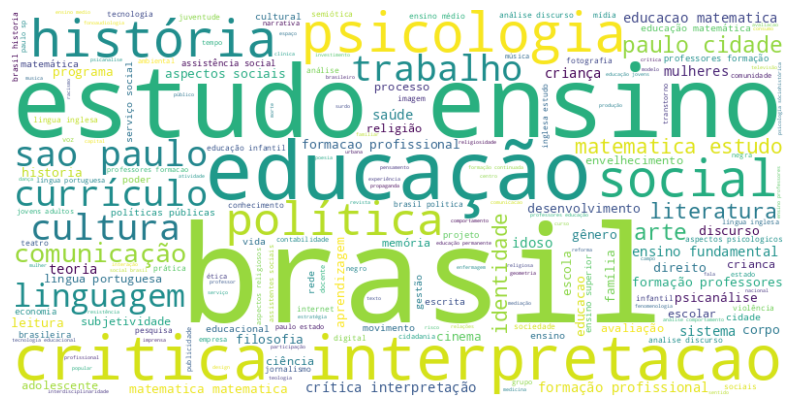

In [36]:
#concatenar as palavras chave em uma única string
all_text = ' '.join(df_pre['palavras_chave_pre'])

#nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

#plotar a imagem
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

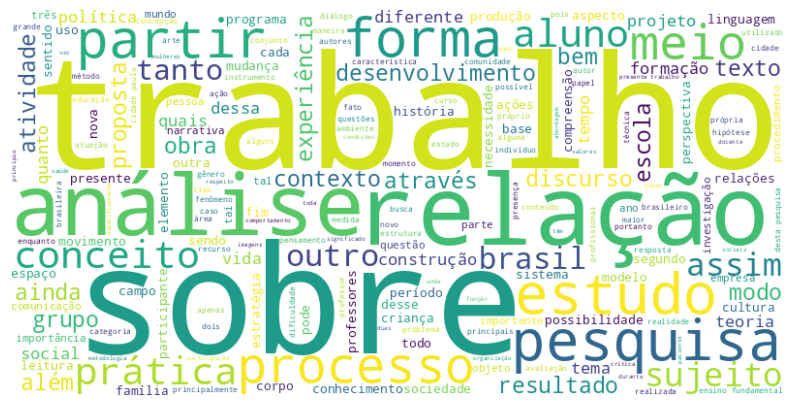

In [37]:
#concatenar os resumos em uma única string
all_text = ' '.join(df_pre['resumo_pre'])

#nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

#plotar a imagem
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## ODS

### Baixando as ODS

In [ ]:
import re
import os

# Função para extrair o texto dentro de chaves e tratar os casos de AND e OU
def extract_phrases(line):
    # Remove "OU" do início da linha
    line = re.sub(r'(^|\s+)OU\s+', r'\1', line)

    # Remove caracteres {} e () da linha
    line = re.sub(r'[{}()]', '', line)

    # Encontra todas as ocorrências de texto entre chaves e as frases sem chaves
    matches = re.findall(r'\b(?:E|OU)\b|\b\w+\b', line)

    # Se houver apenas um conjunto de chaves, retorna como uma única frase
    if len(matches) == 1:
        return [' '.join(matches)]

    # Trata as ocorrências de AND e OU
    phrases = []
    current_phrase = []

    for match in matches:
        if match.lower() == 'ou':
            # Mantém "OU" como palavra apenas se não for o início da frase
            if current_phrase:
                current_phrase.append(match.lower())
        else:
            current_phrase.append(match.lower())

    # Adiciona a frase atual ao resultado se não houver "E" no final da linha
    if current_phrase:
        phrases.append(' '.join(current_phrase))

    # Remove strings vazias
    phrases = [phrase for phrase in phrases if phrase]

    return phrases

# Pasta onde estão os arquivos txt
pasta = r'C:\Users\Ana Clara\Downloads\strings-de-busca-ods'

# Dicionário para armazenar os resultados
resultados = {}

# Itera sobre os arquivos na pasta
for arquivo in os.listdir(pasta):
    if arquivo.endswith('.txt'):
        caminho_arquivo = os.path.join(pasta, arquivo)
        nome_lista = os.path.splitext(arquivo)[0]  # Remove a extensão do arquivo para obter o nome da lista

        # Lista para armazenar as frases do arquivo atual
        frases_arquivo = []

        # Leitura do arquivo e extração das frases
        with open(caminho_arquivo, 'r',  encoding='utf-8') as file:
            for line in file:
                if '{' in line:  # Ignora as linhas que não contêm chaves
                    frases = extract_phrases(line)
                    frases_arquivo.extend(frases)

        # Armazena as frases do arquivo atual na variável correspondente
        resultados[nome_lista] = frases_arquivo

# Exibe os resultados
for nome_lista, frases in resultados.items():
    # Armazena as frases em uma variável com o nome do arquivo (sem a extensão)
    exec(f'{nome_lista} = frases')

# Agora você pode acessar as frases de cada arquivo através de suas respectivas variáveis de lista
# Por exemplo, para acessar as frases do arquivo ods01, você pode usar a variável ods01
print("Frases do arquivo ods01:")
print(ods01)

Frases do arquivo ods01:
['extrema pobreza', 'alívio da pobreza', 'erradicação da pobreza', 'redução da pobreza', 'linha internacional de pobreza', 'ajuda financeira e pobreza', 'ajuda financeira e pobre pobres', 'ajuda financeira e divisão norte sul', 'desenvolvimento financeiro e pobreza', 'empoderamento financeiro', 'efeito sobre a distribuição efeito distributivo', 'efeitos sobre a distribuição efeitos distributivos', 'trabalho infantil', 'ajuda ao desenvolvimento', 'proteção social', 'sistema de proteção social', 'proteção social e acesso', 'microfinanc', 'resiliência dos pobres', 'rede de segurança e pobre s vulnerável is', 'recurso econômico e acesso', 'recursos econômicos e acesso', 'banco de alimentos', 'bancos de alimentos']


In [42]:
ods01 = df_pre.query("resumo_pre.str.contains('extrema pobreza') \
             | resumo_pre.str.contains('erradicação da pobreza')\
             | resumo_pre.str.contains('redução da pobreza')\
             | resumo_pre.str.contains('linha internacional de pobreza')\
             | (resumo_pre.str.contains('ajuda financeira') & resumo_pre.str.contains('pobreza'))\
             | (resumo_pre.str.contains('ajuda financeira') & (resumo_pre.str.contains('pobre')) | resumo_pre.str.contains('pobre'))\
             | (resumo_pre.str.contains('ajuda financeira') & resumo_pre.str.contains('divisão norte-sul'))\
             | (resumo_pre.str.contains('desenvolvimento financeiro') & resumo_pre.str.contains('pobreza'))\
             | resumo_pre.str.contains('empoderamento financeiro')\
             | resumo_pre.str.contains('efeito sobre a distribuição')\
             | resumo_pre.str.contains('efeito distributivo')\
             | resumo_pre.str.contains('efeitos sobre a distribuição')\
             | resumo_pre.str.contains('efeitos distributivo')\
             | resumo_pre.str.contains('trabalho infantil')\
             | resumo_pre.str.contains('ajuda ao desenvolvimento')\
             | resumo_pre.str.contains('proteção social')\
             | resumo_pre.str.contains('sistema de proteção social')\
             | (resumo_pre.str.contains('proteção social') & resumo_pre.str.contains('acesso'))\
             | resumo_pre.str.contains('microfinanc*')\
             | resumo_pre.str.contains('resiliência dos pobres')\
             | (resumo_pre.str.contains('rede de segurança') & resumo_pre.str.contains('pobre'))\
             | (resumo_pre.str.contains('rede de segurança') & resumo_pre.str.contains('pobres'))\
            ")
ods01_2 = df_pre.query("(abstract.str.contains('rede de segurança') & abstract.str.contains('vulneráveis'))\
             | (abstract.str.contains('rede de segurança') & abstract.str.contains('vulnerável'))\
             | (abstract.str.contains('recurso econômico') & abstract.str.contains('acesso'))\
             | (abstract.str.contains('recursos econômicos') & abstract.str.contains('acesso'))\
             | abstract.str.contains('banco de alimentos')\
             | abstract.str.contains('bancos de alimentos')\
             ")

In [48]:
# Part 1
ods02_1 = df_pre.query("(resumo_pre.str.contains('direitos de posse da terra')) \
             | ((resumo_pre.str.contains('pequeno produtor')) & ((resumo_pre.str.contains('fazenda')) \
             | (resumo_pre.str.contains('silvicultura')) \
             | (resumo_pre.str.contains('pastoril')) \
             | (resumo_pre.str.contains('agricultura')))) \
             | (resumo_pre.str.contains('desnutrição')) \
             | ((resumo_pre.str.contains('desnutrido')) | (resumo_pre.str.contains('desnutrida'))) \
             | (resumo_pre.str.contains('subnutrição')) \
             | ((resumo_pre.str.contains('subnutrido')) | (resumo_pre.str.contains('subnutrida'))) \
             | (resumo_pre.str.contains('produção agrícola')) \
             | (resumo_pre.str.contains('produtividade agrícola')) \
             | (resumo_pre.str.contains('práticas agrícolas')) \
             | ((resumo_pre.str.contains('manejo')) | (resumo_pre.str.contains('gestão'))) \ & (resumo_pre.str.contains('agrícola')) \
             | (resumo_pre.str.contains('produção alimentar')) \
             | (resumo_pre.str.contains('produção de alimentos')) \
             ")

# Part 2
ods02_2 = df_pre.query("(resumo_pre.str.contains('produtividade alimentar')) \
             | (resumo_pre.str.contains('produtividade de alimentos')) \
             | (resumo_pre.str.contains('segurança alimentar')) \
             | (resumo_pre.str.contains('insegurança alimentar')) \
             | (resumo_pre.str.contains('direito à terra')) \
             | (resumo_pre.str.contains('direitos à terra')) \
             | (resumo_pre.str.contains('reforma agrária')) \
             | (resumo_pre.str.contains('reformas agrárias')) \
             | (resumo_pre.str.contains('práticas agrícolas resilientes')) \
             | ((resumo_pre.str.contains('agricultura')) & (resumo_pre.str.contains('potássio'))) \
             | (resumo_pre.str.contains('fertilizante')) \
             | (resumo_pre.str.contains('melhoria da nutrição alimentar')) \
             | (resumo_pre.str.contains('fome oculta')) \
             | (resumo_pre.str.contains('alimentos geneticamente modificados')) \
             ")

# Part 3
ods02_3 = df_pre.query("(resumo_pre.str.contains('transgênicos') & resumo_pre.str.contains('alimentos')) \
             | (resumo_pre.str.contains('práticas agroflorestais')) \
             | ((resumo_pre.str.contains('manejo')) | (resumo_pre.str.contains('gestão'))) \
             & (resumo_pre.str.contains('agroflorestal')) \
             | (resumo_pre.str.contains('inovação agrícola')) \
             | ((resumo_pre.str.contains('segurança alimentar')) & (resumo_pre.str.contains('diversidade genética'))) \
             | ((resumo_pre.str.contains('mercado de alimentos')) & ((resumo_pre.str.contains('restrição')) \
             | (resumo_pre.str.contains('tarifa')) \
             | (resumo_pre.str.contains('acesso')) \
             | (resumo_pre.str.contains('divisão norte-sul')) \
             | (resumo_pre.str.contains('governança do desenvolvimento')))) \
             | (resumo_pre.str.contains('governança alimentar')) \
             | (resumo_pre.str.contains('cadeia de abastecimento alimentar')) \
             | (resumo_pre.str.contains('cadeia de valor alimentar')) \
             | (resumo_pre.str.contains('mercado de commodities alimentares')) \
             & (~resumo_pre.str.contains('doença')) \
            ")


In [51]:
df_ods02 = pd.concat([ods02_1,ods02_2,ods02_3])
len(df_ods02)

23

In [43]:
df_ods01 = pd.concat([ods01, ods01_2])
df_ods01

,data,uri,idioma,editor,programa,direito_acesso,departamento,area_cnpq,titulo,tipo,patrocinio,keywords,abstract,palavras_chave,resumo,palavras_chave_pre,resumo_pre
4,2006-08-25,https://tede2.pucsp.br/handle/handle/12953,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Escolas ao povo: experiências de escolarização...,Tese,Coordenação de Aperfeiçoamento de Pessoal de N...,0,0,"Pobres | Escolarização | Bahia | Bahia, BA -- ...",Esta pesquisa teve como objeto acompanhar o pr...,pobres escolarização bahia bahia ba historia e...,pesquisa objeto acompanhar processo tentativas...
70,2016-03-11,https://tede2.pucsp.br/handle/handle/12915,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Justiça desportiva: o Estado Novo entra em cam...,Tese,0,Football | Soccer | Discipline | Sports Justic...,The article&#8223;s main focus is to analyze f...,Futebol | Disciplina | Justiça Desportiva | Di...,O trabalho tem como foco central o processo de...,futebol disciplina justiça desportiva direito ...,trabalho foco central processo disciplinarizaç...
79,2017-06-01,https://tede2.pucsp.br/handle/handle/20246,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Serviço S...,Acesso Aberto,Faculdade de Ciências Sociais,CNPQ::CIENCIAS SOCIAIS APLICADAS::SERVICO SOCIAL,Imigração e miséria no Brasil: o caso dos desc...,Tese,Coordenação de Aperfeiçoamento de Pessoal de N...,Plan Brazil Without Misery (PBSM) | Poverty - ...,Our general objective is to investigate the de...,Plano Brasil Sem Miséria (PBSM) | Pobreza - Po...,Nosso objetivo geral é investigar o processo d...,plano brasil miséria pbsm pobreza política gov...,objetivo geral investigar processo implantação...
129,2017-01-26,https://tede2.pucsp.br/handle/handle/19682,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,Faculdade de Ciências Sociais,CNPQ::CIENCIAS HUMANAS::HISTORIA,História e memória do Teatro Oficina nos anos ...,Tese,Conselho Nacional de Pesquisa e Desenvolviment...,Teatro Oficina - History | Memory | Censorship,Born deepening relations among students of Lar...,Teatro Oficina - História | Memória | Censura,Nascido do aprofundamento de relações entre jo...,teatro oficina história memória censura,nascido aprofundamento relações jovens estudan...
138,2021-09-24,https://repositorio.pucsp.br/jspui/handle/hand...,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Psicologi...,Acesso Aberto,Faculdade de Ciências Humanas e da Saúde,CNPQ::CIENCIAS HUMANAS::PSICOLOGIA::PSICOLOGIA...,O processo de identidade de mulheres frente a ...,Dissertação,Conselho Nacional de Pesquisa e Desenvolviment...,Identity | Women | Social assistance,The relationship between gender and the condit...,Identidade | Mulheres | Assistência Social,"As relações entre gênero, vulnerabilidade soci...",identidade mulheres assistência social,relações gênero vulnerabilidade social pobreza...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,2016-11-07,https://tede2.pucsp.br/handle/handle/19496,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Ciências ...,Acesso Aberto,Faculdade de Ciências Sociais,CNPQ::CIENCIAS SOCIAIS APLICADAS,"Política e pacificação: segurança, participaçã...",Dissertação,Conselho Nacional de Desenvolvimento Científic...,UPP | Pacification | Participation,This work analyzes the security and the partic...,"Favelas - Rio de Janeiro, RJ | Unidades de pol...",Este trabalho analisa a segurança e a particip...,favelas rio janeiro rj unidades polícia pacifi...,trabalho analisa segurança participação favela...
5995,2014-11-03,https://tede2.pucsp.br/handle/handle/17703,por,Pontifícia Universidade Católica de São Paulo,Progra

In [40]:
list_resumo = df_pre["resumo_pre"].tolist()
print(list_resumo[:10])


['pesquisa discute impacto transformação digital departamentos contabilidade corporações iniciase possíveis causas aceleraram transformação digital corporações brasileiras nesse trajeto avalia importância impulso alterações secretaria receita federal brasil produziram nessa evolução propensão interdisciplinar avalia interferências economia tecnologia direito nessas transformações ciência contábil ciência humana assim sendo estudo orienta efeitos alterações produzem papel desempenhado contabilista avalia novas competências contabilista necessita exercer novas tarefas fim esboça efeitos disruptivos contabilista produz novas armas ambiente corporativo discutir precariedade luta qualificação', 'dissertação investiga lyceu francobrasileiro s paulo ligação politica cultural francesa bem processo desenvolvimento institucional desde datam primeiras iniciativas voltadas criação instituição ano passou reforma significativa culminou mudanças envolveram desde estrutura arquitetônica projeto pedagó

In [41]:
# Expressões regulares para correspondência de padrões com caracteres curinga e condições específicas
# Expressões Regulares: São utilizadas para identificar padrões específicos nos textos, como palavras que
# começam com "microfinanc" seguidas de qualquer sequência de caracteres (indicado por \w*).
patterns = {
    "microfinanc": re.compile(r"microfinanc\w*"),
    # Adicione mais padrões aqui conforme necessário para as outras ODS's
}

# Função auxiliar para verificar a presença de uma condição em um resumo
# Função check_condition: Verifica se uma condição específica (uma palavra ou frase) está presente no resumo.
# Isso inclui tanto a verificação de correspondências exatas quanto a busca por padrões definidos pelas expressões regulares.
# Uso de lower(): Para garantir que a busca seja insensível a maiúsculas e minúsculas,
# tanto as condições quanto os resumos são convertidos para letras minúsculas antes da verificação.

def check_condition(summary, condition):
    # Trata buscas com curinga
    if condition in patterns:
        return bool(patterns[condition].search(summary.lower()))
    # Trata correspondências de strings exatas
    else:
        return condition.lower() in summary.lower()

# Função principal para avaliar se um resumo corresponde aos critérios ODS1
# Condições OR: A função matches_ods1 começa verificando uma lista de condições simples
# onde a presença de qualquer uma delas no texto satisfaz a condição OR. Isso é feito usando
# a função any, que retorna True se qualquer uma das condições for verdadeira.
def matches_ods1(summary):
    # Lista de condições, representando as condições OR na sua consulta
    or_conditions = [
        "extrema pobreza",
        "alívio da pobreza",
        "erradicação da pobreza",
        "redução da pobreza",
        "linha internacional de pobreza",
        "empoderamento financeiro",
        "efeito sobre a distribuição/efeito distributivo",
        "efeitos sobre a distribuição/efeitos distributivos",
        "trabalho infantil",
        "ajuda ao desenvolvimento",
        "proteção social",
        "sistema de proteção social",
        "microfinanc",
        "resiliência dos pobres",
        "banco de alimentos",
        "bancos de alimentos",
        # Adicione mais condições simples OR aqui
    ]

    # Verifica condições OR simples
    if any(check_condition(summary, cond) for cond in or_conditions):
        return True

    #Condições Complexas AND/OR: Além das condições simples, a função também verifica
    # condições mais complexas que envolvem lógica AND/OR. Essas condições são representadas
    # por tuplas, onde cada elemento é verificado contra o resumo para determinar se a combinação de condições é atendida.
    # Condições complexas com lógica AND/OR
    and_or_conditions = [
        (("ajuda financeira",), ("pobreza", "pobre", "pobres")),
        (("desenvolvimento financeiro",), ("pobreza",)),
        (("rede de segurança",), ("pobre", "pobres", "vulnerável", "vulneráveis")),
        (("recurso econômico", "recursos econômicos"), ("acesso",)),
        (("proteção social",), ("acesso",)),
        # Adicione mais condições complexas AND/OR aqui conforme necessário para as outras ODS's
    ]
    #Filtragem dos Resumos: Finalmente, a lista de resumos é filtrada utilizando uma compreensão de lista que aplica a função matches_ods1 a cada resumo,
    # mantendo apenas aqueles que satisfazem os critérios que definidos.
    for must_haves, any_of_these in and_or_conditions:
        if all(check_condition(summary, must) for must in must_haves) and any(check_condition(summary, any_of) for any_of in any_of_these):
            return True

    return False



# Filtra os resumos com base nos critérios ODS, nesse caso a ODS1
filtered_resumes = [summary for summary in list_resumo if matches_ods1(summary)]

print(filtered_resumes)
len(filtered_resumes)

['objetivo geral investigar processo implantação implementação plano nacional erradicação extrema pobreza brasil especificamente plano brasil miséria pbsm tendo foco pesquisa imigrantes descendentes pomeranos considerados “ povos comunidades tradicionais ” estado espírito santo justifica necessidade democratização acesso renda serviços socioassistenciais famílias situação extrema pobreza comunidades tradicionais especificamente descendentes pomeranos assistente social fiz parte primeira equipe programa incluir pbsm município santa maria jetibá realizamos estudo qualitativo processo metodológico constituiu entrevista aplicação questionário formulário primeiro boletim nacional plano brasil miséria divulgado ano registrou famílias cidade calculamos assim amostragem deste universo pesquisa encontramos famílias preenchiam perfil sendo somente nove famílias beneficiárias programa concordaram participar pesquisa realizada através formulário plano brasil miséria atuou juntos agricultores área 

54

In [ ]:
filtered_resumes2 = [summary for summary in list_resumo if matches_ods1(summary)]


In [ ]:
import pandas as pd
import re
import os

# Função para extrair o texto dentro de chaves e tratar os casos de AND e OU
def extract_phrases(line):
    # Remove "OU" do início da linha
    line = re.sub(r'(^|\s+)OU\s+', r'\1', line)

    # Remove caracteres {} e () da linha
    line = re.sub(r'[{}()]', '', line)

    # Encontra todas as ocorrências de texto entre chaves e as frases sem chaves
    matches = re.findall(r'\b(?:E|OU)\b|\b\w+\b', line)

    # Se houver apenas um conjunto de chaves, retorna como uma única frase
    if len(matches) == 1:
        return [' '.join(matches)]

    # Trata as ocorrências de AND e OU
    phrases = []
    current_phrase = []

    for match in matches:
        if match.lower() == 'ou':
            # Mantém "OU" como palavra apenas se não for o início da frase
            if current_phrase:
                current_phrase.append(match.lower())
        else:
            current_phrase.append(match.lower())

    # Adiciona a frase atual ao resultado se não houver "E" no final da linha
    if current_phrase:
        phrases.append(' '.join(current_phrase))

    # Remove strings vazias
    phrases = [phrase for phrase in phrases if phrase]

    return phrases

# Pasta onde estão os arquivos txt
pasta = r'C:\Users\Ana Clara\Downloads\strings-de-busca-ods'

# Dicionário para armazenar as palavras-chave de cada arquivo
palavras_arquivos = {}

# Itera sobre os arquivos na pasta
for arquivo in os.listdir(pasta):
    if arquivo.endswith('.txt'):
        caminho_arquivo = os.path.join(pasta, arquivo)
        nome_lista = os.path.splitext(arquivo)[0]  # Remove a extensão do arquivo para obter o nome da lista

        # Conjunto para armazenar as palavras do arquivo atual
        palavras_arquivo = set()

        # Leitura do arquivo e extração das frases
        with open(caminho_arquivo, 'r',  encoding='utf-8') as file:
            for line in file:
                if '{' in line:  # Ignora as linhas que não contêm chaves
                    frase = extract_phrases(line)
                    palavras_arquivo.update(frase)

        # Armazena as palavras do arquivo atual no dicionário
        palavras_arquivos[nome_lista] = palavras_arquivo

# Ler o DataFrame
# Substitua esse trecho pelo código para ler o seu DataFrame
# Suponha que você tenha um DataFrame chamado df com colunas 'palavras_chave' e 'resumo'
# df = pd.read_csv('seu_arquivo.csv')

# Função para verificar se uma linha do DataFrame corresponde a algum arquivo ODS
def verificar_correspondencia(row):
    for nome_lista, palavras_arquivo in palavras_arquivos.items():
        for palavra_chave in row['palavras_chave_pre'].split():
            if palavra_chave in palavras_arquivo:
                return nome_lista
        for palavra_resumo in row['resumo_pre'].split():
            if palavra_resumo in palavras_arquivo:
                return nome_lista
    return "Nenhuma"

# Criar uma coluna no DataFrame para indicar o arquivo ODS relacionado
df_pre['ODS'] = df_pre.apply(verificar_correspondencia, axis=1)

In [ ]:
df_pre['palavras_chave_pre']

0       inovação tecnológica contabilidade contador re...
1       liceu pasteur sao paulo sp história lyceu fran...
2       conjugalidade homossexual companheiros homosse...
3              sociabilidade lazer civilidade modernidade
4       pobres escolarização bahia bahia ba historia e...
                              ...                        
6064    análise combinatória modelo combinatório implí...
6065    professores ensino fundamental formação profis...
6066    contrato comunicação computadores criancas int...
6067    matemática ensino fundamental professores mate...
6068    língua portuguesa estudo ensino leitura identi...
Name: palavras_chave_pre, Length: 6069, dtype: object

In [ ]:
df_pre

,data,uri,idioma,editor,programa,direito_acesso,departamento,area_cnpq,titulo,tipo,patrocinio,keywords,abstract,palavras_chave,resumo,palavras_chave_pre,resumo_pre,ODS
0,2022-03-29,https://repositorio.pucsp.br/jspui/handle/hand...,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Tecnologi...,Acesso Aberto,Faculdade de Ciências Exatas e Tecnologia,CNPQ::ENGENHARIAS,Transformação digital na contabilidade: as nov...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Technological innovation | Accounting | Accoun...,This research discusses the impact of digital ...,Inovação tecnológica | Contabilidade | Contado...,Esta pesquisa discute o impacto da transformaç...,inovação tecnológica contabilidade contador re...,pesquisa discute impacto transformação digital...,Nenhuma
1,2019-08-27,https://tede2.pucsp.br/handle/handle/22688,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Educação:...,Acesso Aberto,Faculdade de Educação,CNPQ::CIENCIAS HUMANAS::EDUCACAO::TOPICOS ESPE...,A política cultural francesa e o Lyceu Franco-...,Dissertação,Conselho Nacional de Pesquisa e Desenvolviment...,Política cultural francesa | Liceu Pasteur (Sa...,This dissertation has as its object the Liceu ...,"Liceu Pasteur (Sao Paulo, SP) - História | Lyc...",Esta dissertação investiga o Lyceu Franco-Bras...,liceu pasteur sao paulo sp história lyceu fran...,dissertação investiga lyceu francobrasileiro s...,ods04
2,2010-05-18,https://tede2.pucsp.br/handle/handle/15921,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Psicologi...,Acesso Aberto,Psicologia,CNPQ::CIENCIAS HUMANAS::PSICOLOGIA,"Homoconjugalidade masculina, revelação e redes...",Dissertação,0,Gay male couple | Social network,This study aimed to understand how the process...,Conjugalidade homossexual | Companheiros homos...,Este estudo teve como objetivo compreender com...,conjugalidade homossexual companheiros homosse...,estudo objetivo compreender processo revelação...,Nenhuma
3,2012-06-22,https://tede2.pucsp.br/handle/handle/12738,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Sociabilidade e modernidade nos espaços de laz...,Dissertação,Coordenação de Aperfeiçoamento de Pessoal de N...,Sociability | Leisure | Civility | Modernity,The practices of sociability and culture of a ...,Sociabilidade | Lazer | Civilidade | Modernidade,As práticas de sociabilidade e cultura de uma ...,sociabilidade lazer civilidade modernidade,práticas sociabilidade cultura sociedade apres...,ods11
4,2006-08-25,https://tede2.pucsp.br/handle/handle/12953,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em História,Acesso Aberto,História,CNPQ::CIENCIAS HUMANAS::HISTORIA,Escolas ao povo: experiências de escolarização...,Tese,Coordenação de Aperfeiçoamento de Pessoal de N...,0,0,"Pobres | Escolarização | Bahia | Bahia, BA -- ...",Esta pesquisa teve como objeto acompanhar o pr...,pobres escolarização bahia bahia ba historia e...,pesquisa objeto acompanhar processo tentativas...,Nenhuma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,2011-11-09,https://tede2.pucsp.br/handle/handle/10901,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Educação ...,Acesso Aberto,Educação,CNPQ::CIENCIAS EXATAS E DA TERRA::MATEMATICA,Análise combinatória e proposta curricular pau...,Dissertação,Secretaria da Educação do Estado de São Paulo,Combinatorial analysis | Implicit combinatoria...,This dissertation is focused on the teaching a...,Análise combinatória | Modelo combinatório imp...,Esta dissertação tem por foco o ensino e a apr...,análise combinatória modelo combinatório implí...,dissertação foco ensino aprendizagem análise c...,Nenhuma
6065,2020-01-29,https://tede2.pucsp.br/handle/handle/23032,por,Pontifícia Univers

In [ ]:
df_pre.shape

(6069, 18)

In [ ]:
df_pre['ODS'].value_counts()

Nenhuma    2077
ods04      1757
ods13       802
ods11       704
ods06       377
ods16        97
ods14        87
ods12        61
ods15        41
ods08        35
ods05        31
Name: ODS, dtype: int64

In [ ]:
df_pre[df_pre['resumo_pre'].str.contains('extrema pobreza')]

,data,uri,idioma,editor,programa,direito_acesso,departamento,area_cnpq,titulo,tipo,patrocinio,keywords,abstract,palavras_chave,resumo,palavras_chave_pre,resumo_pre,ODS
79,2017-06-01,https://tede2.pucsp.br/handle/handle/20246,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Serviço S...,Acesso Aberto,Faculdade de Ciências Sociais,CNPQ::CIENCIAS SOCIAIS APLICADAS::SERVICO SOCIAL,Imigração e miséria no Brasil: o caso dos desc...,Tese,Coordenação de Aperfeiçoamento de Pessoal de N...,Plan Brazil Without Misery (PBSM) | Poverty - ...,Our general objective is to investigate the de...,Plano Brasil Sem Miséria (PBSM) | Pobreza - Po...,Nosso objetivo geral é investigar o processo d...,plano brasil miséria pbsm pobreza política gov...,objetivo geral investigar processo implantação...,ods11
4708,2018-03-05,https://tede2.pucsp.br/handle/handle/20986,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Economia ...,Acesso Aberto,"Faculdade de Economia, Administração, Contábei...",CNPQ::CIENCIAS SOCIAIS APLICADAS::ECONOMIA,Microcrédito e bancarização no Brasil de 1995 ...,Dissertação,0,Microfinance - Brazil | Bank loans - Brazil | ...,The purpose of this study was to analyze the g...,Microfinanças - Brasil | Empréstimos bancários...,O presente estudo teve por objetivo analisar a...,microfinanças brasil empréstimos bancários bra...,presente estudo objetivo analisar concessão mi...,ods05
4783,2012-02-07,https://tede2.pucsp.br/handle/handle/17565,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Serviço S...,Acesso Aberto,Serviço Social,CNPQ::CIENCIAS SOCIAIS APLICADAS::SERVICO SOCIAL,Significados do trabalho informal em Luanda: l...,Tese,Coordenação de Aperfeiçoamento de Pessoal de N...,Youth | Informal work | Petty trade | Inequali...,"This work was carried out in Luanda, capital o...",Juventude | Trabalho informal | Comércio ambul...,O presente trabalho foi desenvolvido na provín...,juventude trabalho informal comércio ambulante...,presente trabalho desenvolvido província luand...,ods08
5659,2010-05-06,https://tede2.pucsp.br/handle/handle/4174,por,Pontifícia Universidade Católica de São Paulo,Programa de Estudos Pós-Graduados em Ciências ...,Acesso Aberto,Ciências Sociais,CNPQ::CIENCIAS SOCIAIS APLICADAS,O processo eleitoral e a reprodução de grupos ...,Dissertação,0,Political and electoral process | Clientelism ...,"Through this study, we propose to describe the...",Processo político-eleitoral | Clientelismo | O...,"Através do presente estudo, nos propomos a des...",processo políticoeleitoral clientelismo oligar...,através presente estudo propomos descrever pro...,Nenhuma


In [ ]:
df_pre.loc[4783, 'resumo_pre']

'presente trabalho desenvolvido província luanda capital república angola partir experiências trabalho vida jovens migrantes envolvidos trabalho informal especificamente venda ambulante objetivo analisar significados jovens migrantes trabalhadores informais luanda atribuem experiências bem motivos levaram envolvimento tais atividades compreensão dessas atividades informais contribui superação condições precárias trabalho sobrevivência jovens vez vivem maioria contexto marcado extrema pobreza vulnerabilidade exclusão desigualdade social entendese conhecimento análise significados atribuídos jovens histórias vivências assim motivos envolvimento atividades informais constituem temas atuais socialmente importantes atendendo poucos quase inexistência estudos abordem realidade partir visão nela envolvido estudo qualitativo fundamentado teoria social marx concretamente perspectiva analítica materialismo dialético crítico participaram estudo jovens migrantes trabalhadores informais luanda ambo